In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import os
import glob
from sklearn import preprocessing
from pysptools import spectro as sp
from IPython.display import display
import ipywidgets as widgets
from math import*
import peakutils
import rampy as rp

In [77]:
path = "../data/algorithmPredictionData/"
txt_files = glob.glob(path + "/**/*.txt", recursive = True)




x = pd.read_csv('../data/enviData/original/s07_ASD_Wavelengths_ASD_0.35-2.5_microns_2151_ch.txt', skiprows = 1, header = None)


newList = []
counter = 0

In [78]:
for index in range(len(txt_files)):
    if txt_files[index].find('_NIC4') < 0 :
        newList.append(txt_files[index])
    #envi = pd.read_fwf(txt_files[index], skiprows = 1, header = None)
    

In [84]:
for index in range(len(newList)):
    temp = pd.read_csv(newList[index], skiprows = 1, header = None)
    if (temp.values < 0).any():
        temp = temp.replace(-1.23e+34, 0)
        if temp[0][0] == 0:
            temp[0][0] = temp[0][1]
        if temp[0][2150] == 0:
            temp[0][2150] = temp[0][2149]
    x_old = list(map(float, x[0]*1000))
    #normalized_spectraValue = preprocessing.normalize([temp[0]])[0]
    x_new = np.arange(350., 2501., 1.)
    y_new = rp.resample(x_old, temp[0], x_new, fill_value="extrapolate")
    mixture = pd.DataFrame(x_new)
    normalized_spectraValue = preprocessing.normalize([y_new])[0]
    mixture[1] = normalized_spectraValue
    mixture.columns = ['wave','reflectance']
    targetPath = newList[index].replace('algorithmPredictionData', 'algorithmPredictionDataProcessed')
    mixture.to_csv(targetPath, index=None, sep=' ')

In [55]:
y = pd.read_csv(newList[45], skiprows = 1, header = None)
y[0]

0      -1.230000e+34
1      -1.230000e+34
2      -1.230000e+34
3      -1.230000e+34
4      -1.230000e+34
            ...     
4590   -1.230000e+34
4591   -1.230000e+34
4592   -1.230000e+34
4593   -1.230000e+34
4594   -1.230000e+34
Name: 0, Length: 4595, dtype: float64

In [50]:



x = pd.read_csv('../data/enviData/MIR/splib07b_Wavelengths_NIC4_Nicolet_1.12-216microns.txt', skiprows = 1, header = None, sep=',')






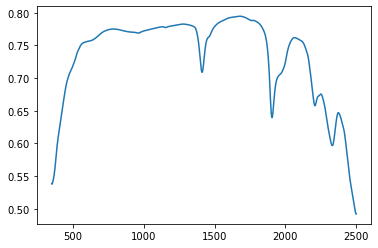

In [85]:
plt.plot(x_new, y_new)

In [82]:
targetPath

'../data/algorithmPredictionDataProcessed/03_Calcite_Dolomite_Montmorillonite.txt'

In [25]:
y_new

array([0.60044492, 0.60157858, 0.60269529, ..., 0.20635734, 0.2057302 ,
       0.20510951])

In [20]:
newList[index]

'../data/algorithmPredictionData/01_Halloysite_Kaolinite.txt'

In [24]:
type(temp[0])

pandas.core.series.Series

In [55]:
preprocessing.normalize([y_new])[0]

array([0.01779315, 0.01782674, 0.01785984, ..., 0.00611504, 0.00609646,
       0.00607807])

In [28]:
print(y_new)

[0.60044492 0.60157858 0.60269529 ... 0.20635734 0.2057302  0.20510951]


In [53]:
for i in y_new:
    print(i)

0.6004449213365733
0.6015785786634268
0.60269529
0.6037848105212948
0.60483694
0.6058452196015081
0.606805370398492
0.6077104883784326
0.6085483316215676
0.60930347
0.6099621634130659
0.61051726
0.6109701436298275
0.6113331263701726
0.6116327027573449
0.6119084372426552
0.61220664
0.6125720063463365
0.61304039
0.6136322671578285
0.61434805
0.6151696490145196
0.6160711009854803
0.61703426
0.6180605797368027
0.61917585
0.6204219041219587
0.6218341
0.6234191273380533
0.6251529326619468
0.62698931
0.6288759511335886
0.63076741
0.6326292381547184
0.63444471
0.636222737647947
0.6379875323520529
0.639758487744545
0.6415329422554549
0.64328039
0.6449558256854431
0.64652437
0.6479818337773244
0.6493595662226755
0.6507086336557268
0.6520742063442732
0.653476
0.6549045257147428
0.65633231
0.6577311335389292
0.6590850264610707
0.6603937827593448
0.6616697172406552
0.66293156
0.6641990373252267
0.6654883
0.6668069534381312
0.6681507665618688
0.6695077534883302
0.6708565865116698
0.672158
0.67338930

In [31]:
np.all(np.isnan(y_new))

False

In [35]:
temp[0]

0       0.600445
1       0.601579
2       0.602695
3       0.603785
4       0.604837
          ...   
2146    0.206991
2147    0.206357
2148    0.205730
2149    0.205109
2150    0.204494
Name: 0, Length: 2151, dtype: float64

In [58]:
for i in temp[0]:
    print(i)

0.60044491
0.60157859
0.60269529
0.6037848
0.60483694
0.60584521
0.60680538
0.60771048
0.60854834
0.60930347
0.60996217
0.61051726
0.61097014
0.61133313
0.6116327
0.61190844
0.61220664
0.61257201
0.61304039
0.61363226
0.61434805
0.61516964
0.61607111
0.61703426
0.61806059
0.61917585
0.62042189
0.6218341
0.62341911
0.62515295
0.62698931
0.62887597
0.63076741
0.63262922
0.63444471
0.63622272
0.63798755
0.63975847
0.64153296
0.64328039
0.64495581
0.64652437
0.64798182
0.64935958
0.65070862
0.65207422
0.653476
0.65490454
0.65633231
0.65773112
0.65908504
0.66039377
0.66166973
0.66293156
0.66419905
0.6654883
0.66680694
0.66815078
0.66950774
0.6708566
0.672158
0.67338932
0.67454314
0.67560899
0.67660105
0.67760158
0.67869842
0.67992896
0.68127507
0.68266481
0.68400621
0.68523687
0.68634737
0.68736792
0.68833989
0.68929696
0.69026464
0.69127148
0.69235659
0.69356287
0.69491851
0.69641876
0.69802135
0.69965601
0.70123482
0.70264095
0.70369297
0.70411968
0.70360386
0.70193088
0.69919759
0.695949

In [43]:
y_new.round(7)

array([0.600445, 0.601579, 0.602695, ..., 0.206357, 0.20573 , 0.20511 ])

In [59]:
len(temp[0])

2151

In [67]:
tt = pd.read_csv(newList[1], skiprows = 1, header = None)

In [70]:
tt

,0
0,-1.230000e+34
1,7.420117e-02
2,7.149619e-02
3,6.659247e-02
4,6.487682e-02
...,...
2146,2.041009e-01
2147,2.041836e-01
2148,2.036902e-01
2149,2.041272e-01


In [75]:
tt.replace(-1.23e+34, 0)

,0
0,0.000000
1,0.074201
2,0.071496
3,0.066592
4,0.064877
...,...
2146,0.204101
2147,0.204184
2148,0.203690
2149,0.204127
